## Libs

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sys
sys.path.append('../src')

import joblib

from lib_aux import *

## Leitura do DataFrame

In [27]:
df = pd.read_csv("../data/SOR/base_modelo.csv")
df.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_69,VAR_70,VAR_71,VAR_72,VAR_73,VAR_74,VAR_75,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,156.38,7.52,0.0,151.0,0.0,3.0,477.84,173.06,0.00,3.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,707.84,NaN,NaN,187.0,NaN,NaN,NaN,184.69,54.00,NaN
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,471.86,NaN,NaN,96.0,NaN,NaN,NaN,732.00,121.98,NaN
3,4,201412,0,0.0,0.0,0.0,0.0,10.58,3796.0,NaN,...,119.96,23.00,0.0,417.0,0.0,0.0,NaN,NaN,0.00,0.0
4,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,NaN,NaN,0.0,75.0,0.0,0.0,914.45,NaN,NaN,0.0


## Análise

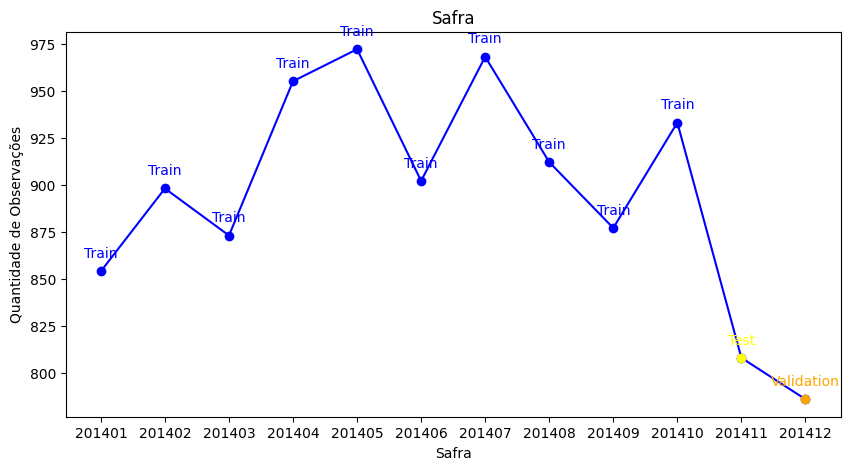

In [28]:
### Olhando as safras

plt.figure(figsize=(10, 5))
df_serie = df["safra"].value_counts().sort_index()
df_serie.plot(kind='line', marker='o', color='blue')

# Change the color of the last two points and add labels
plt.plot(df_serie.index[-2], df_serie.values[-2], 'o', color='yellow')
plt.annotate('Test', (df_serie.index[-2], df_serie.values[-2]), textcoords="offset points", xytext=(0,10), ha='center', color='yellow')

plt.plot(df_serie.index[-1], df_serie.values[-1], 'o', color='orange')
plt.annotate('Validation', (df_serie.index[-1], df_serie.values[-1]), textcoords="offset points", xytext=(0,10), ha='center', color='orange')

# Label the blue points as 'Train'
for i in range(len(df_serie) - 2):
    plt.annotate('Train', (df_serie.index[i], df_serie.values[i]), textcoords="offset points", xytext=(0,10), ha='center', color='blue')

plt.xticks(ticks=df_serie.index, labels=df_serie.index)
plt.xlabel('Safra')
plt.ylabel('Quantidade de Observações')
plt.title('Safra')
plt.savefig("../graficos/safras.png")
plt.show()


In [29]:
# Apply filtering
df_test = df[df["safra"] == 201411].copy(deep=True)
df_val = df[df["safra"] == 201412].copy(deep=True)
df = df[df["safra"] < 201411].reset_index(drop=True)

# Print final results
print("df_test shape:", df_test.shape)
print("df_val shape:", df_val.shape)
print("df shape:", df.shape)

df_test shape: (808, 81)
df_val shape: (786, 81)
df shape: (9144, 81)


In [31]:
### Contando NA Values de cada coluna, com porcentagem

na_count = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)
na_count_critical = na_count[na_count >= 60]
df = df.drop(columns = na_count_critical.index)
df.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_66,VAR_67,VAR_69,VAR_71,VAR_72,VAR_73,VAR_74,VAR_76,VAR_77,VAR_78
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,8.0,-69.0,156.38,0.0,151.0,0.0,3.0,173.06,0.00,3.0
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,24.0,NaN,707.84,NaN,187.0,NaN,NaN,184.69,54.00,NaN
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,18.0,NaN,471.86,NaN,96.0,NaN,NaN,732.00,121.98,NaN
3,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,NaN,-272.0,NaN,0.0,75.0,0.0,0.0,NaN,NaN,0.0
4,6,201405,0,61.0,0.0,4.0,1.0,NaN,140.0,39.83,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN


In [32]:
outliers_count = count_outliers(df, normalize = True)
outliers_count = pd.Series(outliers_count).sort_values(ascending=False)
outliers_count

VAR_3     0.179353
VAR_19    0.165573
VAR_20    0.153543
VAR_33    0.152122
VAR_22    0.148841
            ...   
VAR_40    0.000000
VAR_44    0.000000
VAR_64    0.000000
VAR_57    0.000000
VAR_60    0.000000
Length: 62, dtype: float64

In [33]:
outliers_count[outliers_count == 0]

y         0.0
safra     0.0
VAR_28    0.0
VAR_27    0.0
id        0.0
VAR_40    0.0
VAR_44    0.0
VAR_64    0.0
VAR_57    0.0
VAR_60    0.0
dtype: float64

In [34]:
corr_matrix = df[df.columns[2:]].corr()
top_20_corr = corr_matrix['y'].abs().sort_values(ascending=False).head(21)[1:]
top_20_corr ### Vendo as maiores correlações com a target

VAR_1     0.375908
VAR_2     0.240698
VAR_3     0.189109
VAR_20    0.167445
VAR_4     0.162115
VAR_32    0.158329
VAR_28    0.147428
VAR_25    0.145423
VAR_64    0.139762
VAR_40    0.139700
VAR_44    0.139307
VAR_19    0.131502
VAR_42    0.131124
VAR_65    0.131095
VAR_22    0.130740
VAR_60    0.128562
VAR_46    0.128255
VAR_57    0.127929
VAR_26    0.124826
VAR_14    0.120946
Name: y, dtype: float64

In [35]:
eliminate_columns, corr_appearances = get_columns_to_eliminate_by_corr(corr_matrix)
eliminate_columns

A correlação absoluta entre ('VAR_74', 'VAR_78') é 0.9986763826612842
A correlação absoluta entre ('VAR_71', 'VAR_73') é 0.9972517297535333
A correlação absoluta entre ('VAR_57', 'VAR_60') é 0.9910875036370737
A correlação absoluta entre ('VAR_19', 'VAR_22') é 0.9763676116561351
A correlação absoluta entre ('VAR_10', 'VAR_69') é 0.9755344790621753
A correlação absoluta entre ('VAR_24', 'VAR_58') é 0.9742960168428221
A correlação absoluta entre ('VAR_25', 'VAR_28') é 0.9726039960187397
A correlação absoluta entre ('VAR_39', 'VAR_45') é 0.9722692766407642
A correlação absoluta entre ('VAR_40', 'VAR_44') é 0.9685845115491591
A correlação absoluta entre ('VAR_14', 'VAR_26') é 0.9558865364601629
A correlação absoluta entre ('VAR_44', 'VAR_64') é 0.9050211313899842
A correlação absoluta entre ('VAR_10', 'VAR_23') é 0.883002160437137
A correlação absoluta entre ('VAR_40', 'VAR_64') é 0.8702796284929198
A correlação absoluta entre ('VAR_71', 'VAR_78') é 0.8659333177575372
A correlação absoluta

['VAR_44',
 'VAR_10',
 'VAR_40',
 'VAR_64',
 'VAR_71',
 'VAR_78',
 'VAR_73',
 'VAR_78',
 'VAR_39',
 'VAR_58',
 'VAR_23',
 'VAR_69',
 'VAR_22']

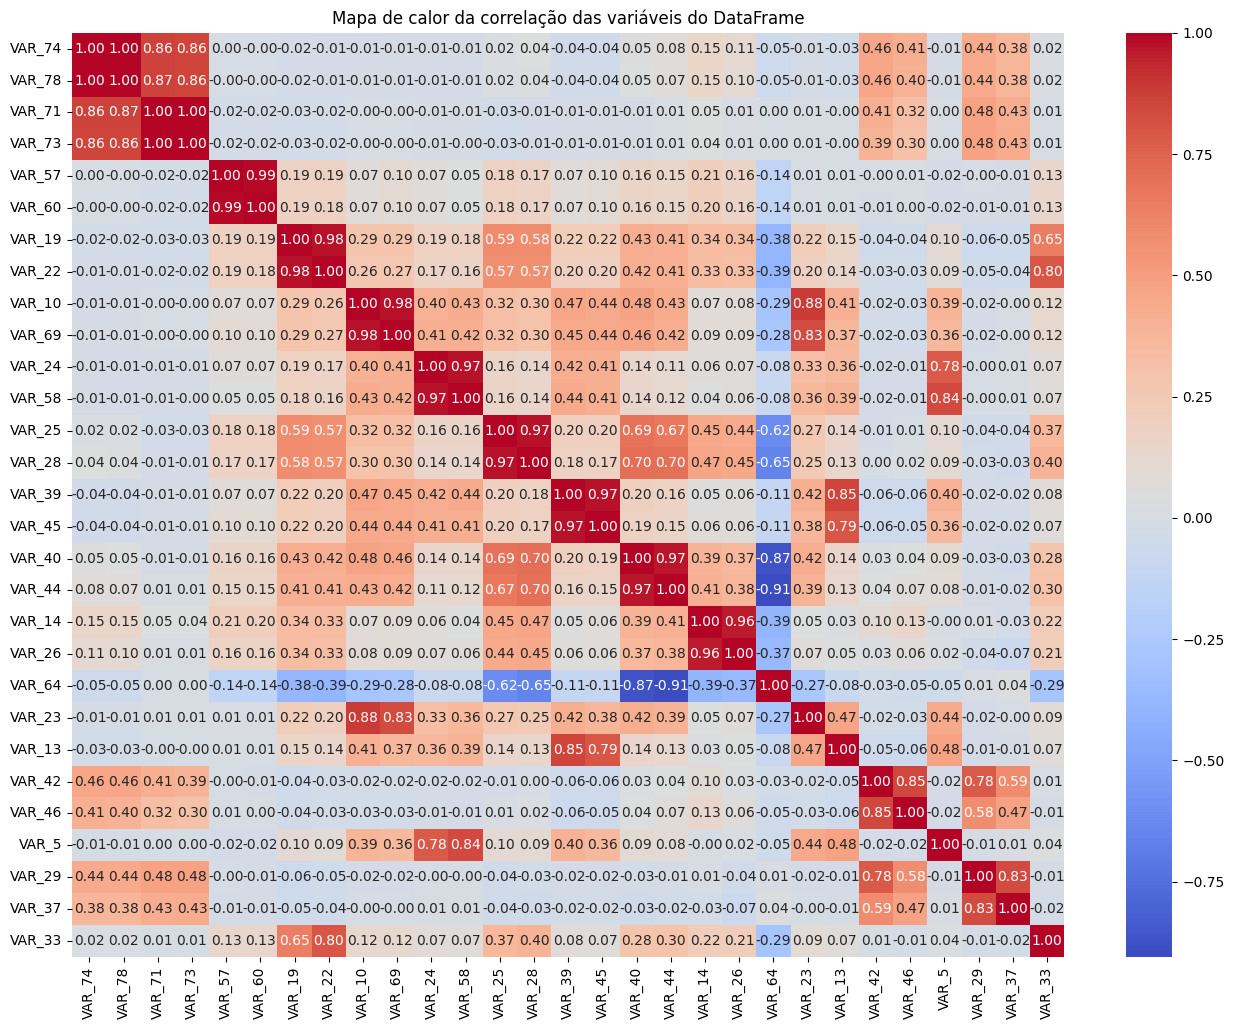

In [36]:
import seaborn as sns

df_corr_key = df[list(corr_appearances.keys())]

plt.figure(figsize=(16, 12))
sns.heatmap(df_corr_key.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor da correlação das variáveis do DataFrame')
plt.savefig("../graficos/matriz_alta_correlacao.png")
plt.show()

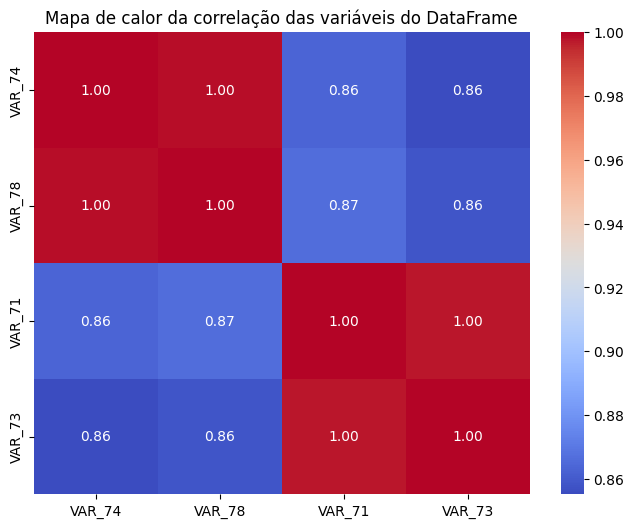

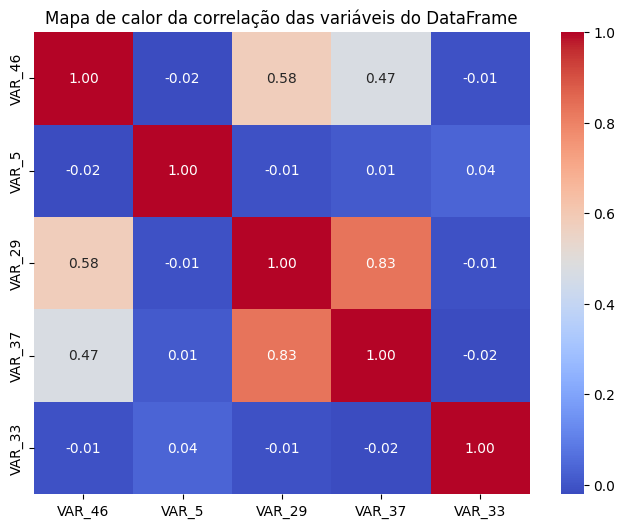

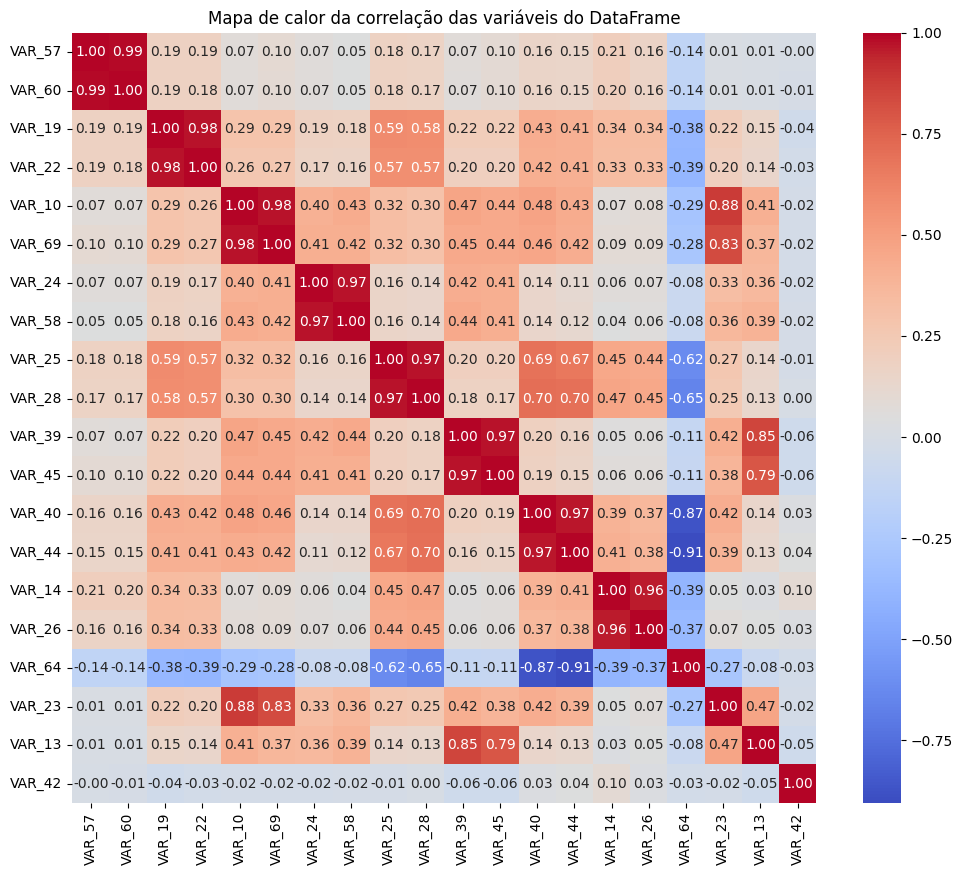

In [37]:
#### Deixando mais fácil de visualizar

df_corr_key = df[list(corr_appearances.keys())]

show_heatmap(df[list(corr_appearances.keys())[:4]])
show_heatmap(df[list(corr_appearances.keys())[-5:]])
show_heatmap(df[list(corr_appearances.keys())[4:-5]], size = (12, 10))

In [38]:
### Agora podemos ver o repositório 

columns_to_drop = set(eliminate_columns)
columns_to_keep = [col for col in df_corr_key.columns if col not in columns_to_drop]
columns_to_keep

['VAR_74',
 'VAR_57',
 'VAR_60',
 'VAR_19',
 'VAR_24',
 'VAR_25',
 'VAR_28',
 'VAR_45',
 'VAR_14',
 'VAR_26',
 'VAR_13',
 'VAR_42',
 'VAR_46',
 'VAR_5',
 'VAR_29',
 'VAR_37',
 'VAR_33']

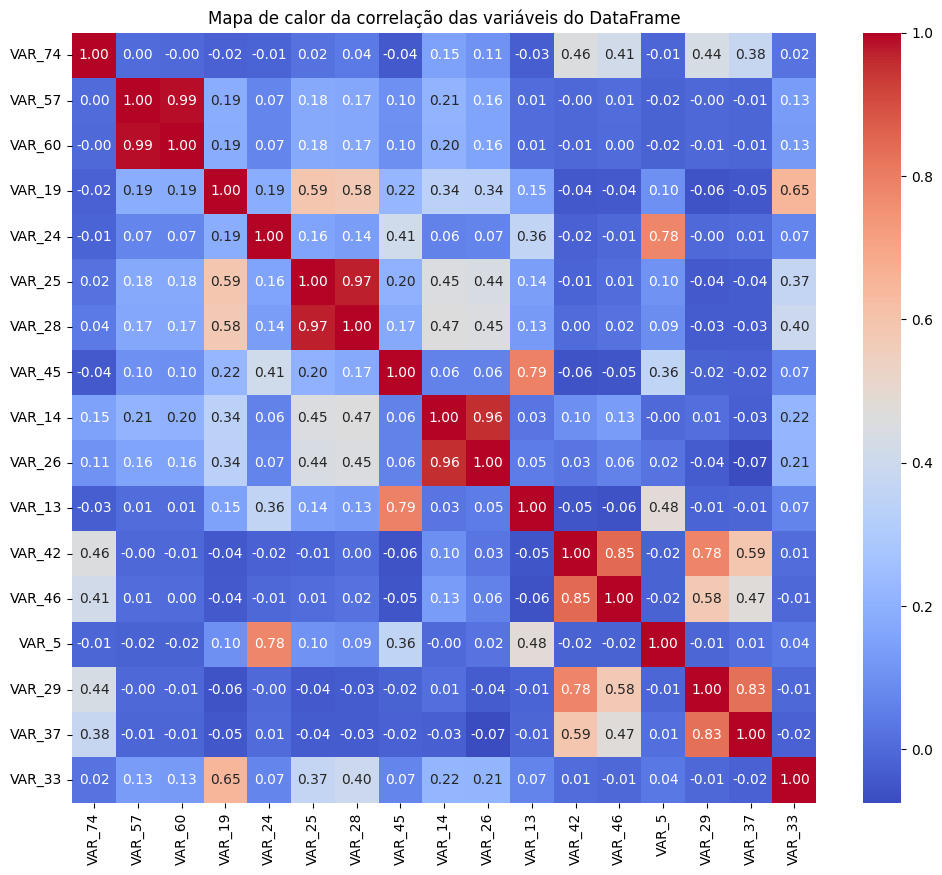

In [39]:
show_heatmap(df[columns_to_keep], size = (12, 10))

In [40]:
### Como mostra o mapa de calor, ainda temos muitas variáveis correlacionadas, portanto vamos levar em conta a contagem de NA's e variância

df[columns_to_keep].agg(['var', na_percentage]).T.rename(columns={"na_percentage": "% de NAs"})


### Entre as colunas 57 e 60, 25 e 28, 45 e 13, 42 e 46, serão mantidos as colunas de maior variância

,var,% de NAs
VAR_74,2.502764,52.5%
VAR_57,163.812942,0.0%
VAR_60,0.111383,0.0%
VAR_19,254.441404,0.5%
VAR_24,90290.649956,37.8%
VAR_25,14.762769,0.5%
VAR_28,20.196434,0.5%
VAR_45,92095.586633,48.3%
VAR_14,156884.623471,52.5%
VAR_26,148050.746732,52.5%


In [41]:
columns = [f"VAR_{x}" for x in [57, 60, 25, 28, 45, 13, 42, 46]]
df[columns].agg(['var', na_percentage]).T.rename(columns={"na_percentage": "% de NAs"}) ### Ou seja, as colunas 57, 28, 45 e 46 serão mantidas
                                                                                        ### e as colunas 60, 25, 13 e 42 serão eliminadas

,var,% de NAs
VAR_57,163.812942,0.0%
VAR_60,0.111383,0.0%
VAR_25,14.762769,0.5%
VAR_28,20.196434,0.5%
VAR_45,92095.586633,48.3%
VAR_13,5884.994715,48.3%
VAR_42,614.861688,54.5%
VAR_46,953.636707,53.5%


In [42]:
df.drop(columns = [f"VAR_{x}" for x in [60, 25, 13, 42]], inplace=True)
df.drop(columns = columns_to_drop, inplace=True)
df.head()

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_54,VAR_57,VAR_59,VAR_65,VAR_66,VAR_67,VAR_72,VAR_74,VAR_76,VAR_77
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,500.00,45,95.54,1303.79,8.0,-69.0,151.0,3.0,173.06,0.00
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,2000.00,60,97.73,1486.26,24.0,NaN,187.0,NaN,184.69,54.00
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,1893.35,31,294.57,800.27,18.0,NaN,96.0,NaN,732.00,121.98
3,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,2946.29,38,NaN,1457.78,NaN,-272.0,75.0,0.0,NaN,NaN
4,6,201405,0,61.0,0.0,4.0,1.0,NaN,140.0,39.83,...,800.00,33,NaN,390.54,NaN,NaN,5.0,NaN,NaN,NaN


In [43]:
_, _ = get_columns_to_eliminate_by_corr(df[2:].corr())


A correlação absoluta entre ('VAR_14', 'VAR_26') é 0.9558779661150237
A correlação absoluta entre ('VAR_29', 'VAR_37') é 0.8308263970607569
A correlação absoluta entre ('VAR_5', 'VAR_24') é 0.779265269251276


In [44]:
columns = [f"VAR_{x}" for x in [14, 26, 29, 37]]
df[columns].agg(['var', na_percentage]).T.rename(columns={"na_percentage": "% de NAs"}) ## As colunas 14 e 37 serão mantidas e 
                                                                        ## as colunas 26 e 29 serão eliminadas

,var,% de NAs
VAR_14,156884.623471,52.5%
VAR_26,148050.746732,52.5%
VAR_29,446.852092,56.3%
VAR_37,526.001575,57.7%


In [45]:
df.drop(columns = ["VAR_26", "VAR_29"], inplace=True)

### Filling de NAs

In [46]:
na_lines = (df.T.isna().sum()/len(df.columns)).sort_values(ascending=False)
na_lines_critical = na_lines[na_lines > 0.5]
na_lines_critical

643     0.727273
3318    0.659091
9107    0.659091
3869    0.636364
664     0.636364
          ...   
1867    0.522727
2166    0.522727
7449    0.522727
6802    0.522727
1888    0.522727
Length: 156, dtype: float64

In [47]:
df

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_54,VAR_57,VAR_59,VAR_65,VAR_66,VAR_67,VAR_72,VAR_74,VAR_76,VAR_77
0,1,201404,0,0.0,0.0,0.0,0.0,124.54,3277.0,51.98,...,500.00,45,95.54,1303.79,8.0,-69.0,151.0,3.0,173.06,0.00
1,2,201407,0,64.0,0.0,2.0,1.0,47.92,2443.0,84.72,...,2000.00,60,97.73,1486.26,24.0,NaN,187.0,NaN,184.69,54.00
2,3,201405,0,99.0,2.0,2.0,2.0,80.38,1824.0,26.63,...,1893.35,31,294.57,800.27,18.0,NaN,96.0,NaN,732.00,121.98
3,5,201403,1,0.0,0.0,0.0,0.0,70.46,437.0,40.69,...,2946.29,38,NaN,1457.78,NaN,-272.0,75.0,0.0,NaN,NaN
4,6,201405,0,61.0,0.0,4.0,1.0,NaN,140.0,39.83,...,800.00,33,NaN,390.54,NaN,NaN,5.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,10734,201406,0,44.0,0.0,0.0,1.0,107.49,515.0,183.36,...,500.00,27,NaN,1004.50,NaN,NaN,-67.0,NaN,NaN,NaN
9140,10735,201407,0,0.0,0.0,0.0,0.0,39.98,1029.0,NaN,...,2024.65,40,29.01,NaN,7.0,-20.0,404.0,2.0,0.00,61.11
9141,10736,201403,1,169.0,3.0,1.0,2.0,105.08,819.0,49.28,...,2759.03,45,369.46,599.81,5.0,-1.0,7.0,3.0,420.16,0.00
9142,10737,201402,1,46.0,0.0,0.0,1.0,265.79,1740.0,NaN,...,NaN,28,319.33,NaN,20.0,NaN,6.0,NaN,358.08,92.91


In [48]:
df.columns[3:]

Index(['VAR_1', 'VAR_2', 'VAR_3', 'VAR_4', 'VAR_5', 'VAR_6', 'VAR_7', 'VAR_8',
       'VAR_9', 'VAR_11', 'VAR_14', 'VAR_15', 'VAR_17', 'VAR_19', 'VAR_20',
       'VAR_24', 'VAR_27', 'VAR_28', 'VAR_30', 'VAR_31', 'VAR_32', 'VAR_33',
       'VAR_34', 'VAR_35', 'VAR_37', 'VAR_38', 'VAR_45', 'VAR_46', 'VAR_51',
       'VAR_52', 'VAR_53', 'VAR_54', 'VAR_57', 'VAR_59', 'VAR_65', 'VAR_66',
       'VAR_67', 'VAR_72', 'VAR_74', 'VAR_76', 'VAR_77'],
      dtype='object')

In [49]:

### Transformando pra log
skew_and_var = get_skew_and_variance(df[df.columns[3:]])
pd.set_option('display.float_format', '{:,.2f}'.format)
skew_and_var = skew_and_var.sort_values(by="Skewness", ascending=False)
skew_and_var["abs_skew"] = skew_and_var["Skewness"].abs()
skew_and_var = skew_and_var.sort_values(by="abs_skew", ascending=False)
skew_and_var

,Column,Skewness,Variance,abs_skew
5,VAR_6,63.89,"42,433,191.72",63.89
7,VAR_8,14.85,"4,737.69",14.85
27,VAR_46,7.08,953.64,7.08
9,VAR_11,6.00,"3,866.81",6.00
36,VAR_67,-5.30,"234,959.71",5.30
2,VAR_3,4.99,0.73,4.99
24,VAR_37,-4.85,526.00,4.85
1,VAR_2,4.56,1.63,4.56
19,VAR_31,4.34,666.73,4.34
39,VAR_76,4.12,"324,673.31",4.12


In [50]:
skew_and_var = skew_and_var[(skew_and_var["Variance"] > 1500) & (skew_and_var["abs_skew"] > 1.5)]

### Preparando o shift a direita
min_value_columns = df[df.columns[3:]].describe().loc['min']
min_value_columns = min_value_columns[min_value_columns < 1]
min_value_columns = pd.DataFrame({"Column": min_value_columns.index, "min": min_value_columns.values})
min_value_columns["min"] = min_value_columns["min"].abs() + 1

skew_and_var = skew_and_var.merge(min_value_columns, on="Column")

In [51]:
df_log = df.copy(deep=True)
df_test_log = df_test.copy(deep=True)

### Aplicando log e shift nas colunas
for column in skew_and_var["Column"]:
    df_log[f"log_{column}"] = np.log(df_log[column] + skew_and_var[skew_and_var["Column"] == column]["min"].values[0])
    df_test_log[f"log_{column}"] = np.log(df_test_log[column] + skew_and_var[skew_and_var["Column"] == column]["min"].values[0])
    
df_log.drop(columns = skew_and_var["Column"], inplace=True)
df_test_log.drop(columns = skew_and_var["Column"], inplace=True)
df_log

,id,safra,y,VAR_2,VAR_3,VAR_4,VAR_9,VAR_14,VAR_17,VAR_19,...,log_VAR_65,log_VAR_15,log_VAR_35,log_VAR_52,log_VAR_5,log_VAR_38,log_VAR_24,log_VAR_45,log_VAR_1,log_VAR_59
0,1,201404,0,0.00,0.00,0.00,500.00,"1,024.00","3,000.00",45.00,...,7.17,3.35,NaN,4.02,4.84,5.40,6.20,6.24,0.00,4.57
1,2,201407,0,0.00,2.00,1.00,"1,000.00",NaN,NaN,18.00,...,7.30,NaN,NaN,NaN,3.91,5.83,5.82,5.60,4.17,4.59
2,3,201405,0,2.00,2.00,2.00,"1,893.35",NaN,NaN,2.00,...,6.69,4.32,4.11,5.69,4.41,4.90,5.90,NaN,4.61,5.69
3,5,201403,1,0.00,0.00,0.00,"2,000.00",288.00,NaN,0.00,...,7.29,3.44,5.75,5.01,4.28,5.79,6.20,NaN,0.00,NaN
4,6,201405,0,0.00,4.00,1.00,400.00,NaN,NaN,0.00,...,5.97,NaN,NaN,NaN,NaN,5.63,NaN,NaN,4.13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,10734,201406,0,0.00,0.00,1.00,500.00,NaN,NaN,0.00,...,6.91,3.96,4.98,3.96,4.70,6.48,6.40,NaN,3.81,NaN
9140,10735,201407,0,0.00,0.00,0.00,"1,724.65",342.00,NaN,0.00,...,NaN,NaN,NaN,NaN,3.74,NaN,3.74,NaN,0.00,3.40
9141,10736,201403,1,3.00,1.00,2.00,"2,759.03",399.00,"2,000.00",0.00,...,6.40,3.67,6.13,5.24,4.67,5.51,6.10,6.04,5.14,5.91
9142,10737,201402,1,0.00,0.00,1.00,"1,000.00",NaN,"1,000.00",6.00,...,NaN,NaN,NaN,NaN,5.59,NaN,6.84,4.93,3.85,5.77


In [26]:
df = df.drop(index = na_lines_critical.index)
df = fill_na_by(df, "safra", method='median')
df_log = df_log.drop(index = na_lines_critical.index)
df_log = fill_na_by(df_log, "safra", method='median')
df

c:\Users\Leonardo\credit-code-challenge\notebooks\../src\lib_aux.py:176: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5193.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[coluna_alvo].isna() & (df[column] == grouped_var), coluna_alvo] = grouped_df.loc[grouped_var, (coluna_alvo, method)]
c:\Users\Leonardo\credit-code-challenge\notebooks\../src\lib_aux.py:176: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '5193.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[coluna_alvo].isna() & (df[column] == grouped_var), coluna_alvo] = grouped_df.loc[grouped_var, (coluna_alvo, method)]


,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_54,VAR_57,VAR_59,VAR_65,VAR_66,VAR_67,VAR_72,VAR_74,VAR_76,VAR_77
0,1.00,201404,0,0.00,0.00,0.00,0.00,124.54,"3,277.00",51.98,...,500.00,45,95.54,"1,303.79",8.00,-69.00,151.00,3.00,173.06,0.00
1,2.00,201407,0,64.00,0.00,2.00,1.00,47.92,"2,443.00",84.72,...,"2,000.00",60,97.73,"1,486.26",24.00,-51.00,187.00,0.00,184.69,54.00
2,3.00,201405,0,99.00,2.00,2.00,2.00,80.38,"1,824.00",26.63,...,"1,893.35",31,294.57,800.27,18.00,-47.50,96.00,0.00,732.00,121.98
3,5.00,201403,1,0.00,0.00,0.00,0.00,70.46,437.00,40.69,...,"2,946.29",38,237.26,"1,457.78",13.00,-272.00,75.00,0.00,297.39,0.00
4,6.00,201405,0,61.00,0.00,4.00,1.00,68.42,140.00,39.83,...,800.00,33,246.66,390.54,13.00,-47.50,5.00,0.00,305.48,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,"10,734.00",201406,0,44.00,0.00,0.00,1.00,107.49,515.00,183.36,...,500.00,27,282.23,"1,004.50",14.00,-47.00,-67.00,0.00,353.08,0.00
9140,"10,735.00",201407,0,0.00,0.00,0.00,0.00,39.98,"1,029.00",64.23,...,"2,024.65",40,29.01,699.07,7.00,-20.00,404.00,2.00,0.00,61.11
9141,"10,736.00",201403,1,169.00,3.00,1.00,2.00,105.08,819.00,49.28,...,"2,759.03",45,369.46,599.81,5.00,-1.00,7.00,3.00,420.16,0.00
9142,"10,737.00",201402,1,46.00,0.00,0.00,1.00,265.79,"1,740.00",50.05,...,"1,400.00",28,319.33,985.58,20.00,-51.00,6.00,0.00,358.08,92.91


In [52]:
outliers_count = count_outliers(df)
outliers_count = pd.Series(outliers_count).sort_values(ascending=False)
outliers_count

VAR_3     1640
VAR_19    1514
VAR_20    1404
VAR_33    1391
VAR_2     1108
VAR_74    1063
VAR_72     936
VAR_1      798
VAR_30     660
VAR_65     625
VAR_54     589
VAR_4      572
VAR_67     511
VAR_53     506
VAR_31     392
VAR_6      351
VAR_76     339
VAR_5      324
VAR_9      307
VAR_17     293
VAR_51     283
VAR_24     281
VAR_8      268
VAR_7      266
VAR_11     259
VAR_15     255
VAR_37     247
VAR_34     240
VAR_52     239
VAR_46     236
VAR_38     231
VAR_35     231
VAR_45     218
VAR_77     199
VAR_66     197
VAR_59     174
VAR_14     120
VAR_32      21
y            0
id           0
safra        0
VAR_27       0
VAR_28       0
VAR_57       0
dtype: int64

In [53]:
scaler = StandardScaler()
scaler_log = StandardScaler()
df[df.columns[3:]] = scaler.fit_transform(df[df.columns[3:]]) ### Normalizando as variáveis
df_log[df_log.columns[3:]] = scaler_log.fit_transform(df_log[df_log.columns[3:]]) ### Normalizando as variáveis
df

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_54,VAR_57,VAR_59,VAR_65,VAR_66,VAR_67,VAR_72,VAR_74,VAR_76,VAR_77
0,1,201404,0,-0.73,-0.31,-0.35,-0.49,0.44,0.28,-0.28,...,-0.79,-0.07,-0.81,0.07,-0.63,0.29,-0.03,1.49,-0.52,-0.64
1,2,201407,0,0.61,-0.31,1.99,0.32,-0.56,0.15,0.31,...,0.13,1.11,-0.80,0.19,0.43,NaN,0.09,NaN,-0.50,-0.10
2,3,201405,0,1.34,1.25,1.99,1.13,-0.14,0.06,-0.73,...,0.06,-1.16,-0.03,-0.29,0.03,NaN,-0.21,NaN,0.46,0.58
3,5,201403,1,-0.73,-0.31,-0.35,-0.49,-0.27,-0.16,-0.48,...,0.71,-0.61,NaN,0.17,NaN,-0.13,-0.28,-0.41,NaN,NaN
4,6,201405,0,0.55,-0.31,4.33,0.32,NaN,-0.20,-0.49,...,-0.61,-1.00,NaN,-0.58,NaN,NaN,-0.51,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9139,10734,201406,0,0.19,-0.31,-0.35,0.32,0.22,-0.14,2.08,...,-0.79,-1.47,NaN,-0.14,NaN,NaN,-0.75,NaN,NaN,NaN
9140,10735,201407,0,-0.73,-0.31,-0.35,-0.49,-0.67,-0.06,NaN,...,0.15,-0.46,-1.07,NaN,-0.69,0.39,0.80,0.86,-0.82,-0.03
9141,10736,201403,1,2.80,2.04,0.82,1.13,0.18,-0.10,-0.32,...,0.60,-0.07,0.26,-0.43,-0.82,0.43,-0.51,1.49,-0.09,-0.64
9142,10737,201402,1,0.23,-0.31,-0.35,0.32,2.28,0.04,NaN,...,NaN,-1.39,0.07,NaN,0.17,NaN,-0.51,NaN,-0.20,0.29


StandardScaler()

In [29]:
df.reset_index(drop = True).to_parquet("../data/SOT/base_tratada_treino.parquet", index=False) ### Salvando o arquivo tratado

In [30]:
df_log.reset_index(drop = True).to_parquet("../data/SOT/base_tratada_treino_LOG.parquet", index=False) ### Salvando o arquivo tratado

In [31]:
df_test = df_test[df.columns].reset_index(drop=True) ### Pega as colunas
df_test = fill_na_by(df_test, method = "median") ### Preenche os NA's
df_test[df_test.columns[3:]] = scaler.transform(df_test[df_test.columns[3:]]) ### Normalizando as variáveis
df_test_log = df_test_log[df_log.columns].reset_index(drop=True) ### Pega as colunas
df_test_log = fill_na_by(df_test_log, method = "median") ### Preenche os NA's
df_test_log[df_test_log.columns[3:]] = scaler_log.transform(df_test_log[df_test_log.columns[3:]]) ### Normalizando as variáveis
df_test

,id,safra,y,VAR_1,VAR_2,VAR_3,VAR_4,VAR_5,VAR_6,VAR_7,...,VAR_54,VAR_57,VAR_59,VAR_65,VAR_66,VAR_67,VAR_72,VAR_74,VAR_76,VAR_77
0,13,201411,1,-0.73,-0.31,-0.34,-0.48,1.34,-0.15,-0.68,...,-0.48,-0.06,0.03,-0.31,-0.13,0.15,0.05,-0.27,-0.15,-0.43
1,20,201411,0,-0.73,-0.31,-0.34,-0.48,-0.16,0.00,-0.25,...,1.55,0.64,0.03,-0.31,-0.50,0.11,2.53,-0.27,-0.15,-0.43
2,32,201411,0,-0.54,-0.31,-0.34,-0.48,-0.01,0.35,-0.25,...,-0.12,-1.08,0.64,0.62,0.06,0.16,-0.41,0.60,1.05,0.20
3,36,201411,1,0.31,-0.31,-0.34,0.34,-0.45,-0.13,0.17,...,-0.09,-0.38,-0.64,-0.22,-0.13,0.15,-0.72,2.35,-0.39,-0.43
4,47,201411,0,-0.73,-0.31,-0.34,-0.48,-0.16,-0.18,-0.25,...,-0.74,1.42,0.03,1.08,-0.13,0.15,0.33,-0.27,-0.15,-0.43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,10675,201411,0,-0.73,-0.31,-0.34,-0.48,4.29,0.50,0.58,...,-0.74,-0.30,-0.72,2.36,0.71,0.15,-0.44,-0.27,-0.46,-0.43
804,10685,201411,1,3.25,7.62,2.02,1.97,0.11,-0.05,-0.25,...,-0.51,1.03,0.03,-0.65,1.91,0.15,-0.38,-0.27,1.37,0.40
805,10703,201411,0,-0.73,-0.31,-0.34,-0.48,-0.16,0.51,-0.86,...,0.95,2.04,-1.23,-0.31,-0.13,-0.01,0.15,-0.27,-0.81,-0.43
806,10713,201411,1,-0.73,-0.31,-0.34,-0.48,-0.09,0.45,-0.79,...,-0.07,-1.00,0.03,0.17,-0.13,0.15,0.01,-0.27,-0.15,-0.43


In [32]:
df_test.to_parquet("../data/SOT/base_tratada_teste.parquet", index=False) ### Salvando o arquivo tratado
df_test_log.to_parquet("../data/SOT/base_tratada_teste_LOG.parquet", index=False) ### Salvando o arquivo tratado

In [33]:
df_val = df_val[df.columns].reset_index(drop=True)
df_val.to_parquet("../data/SOT/base_validacao_sem_colocar_na.parquet", index=False) 
df_val = fill_na_by(df_val, method = "median")
df_val.to_parquet("../data/SOT/base_validacao_nao_normalizada.parquet", index=False) ### Salvando o arquivo tratado

In [62]:
#### Salvando os scalers

joblib.dump(scaler, "../artifacts/scaler.pkl")
joblib.dump(scaler_log, "../artifacts/scaler_log.pkl")

['../artifacts/scaler_log.pkl']